# TODO
## CHeck calibration ranges - also the data just sucks

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [52]:
df = pd.read_csv('c2h.csv')
df = convert_time_to_seconds(df, 'Time')

In [53]:
# Calibrate Thermistor
calibration_df = df[(df['Time'] >= 72) ]#& (df['Time'] <= 100)]
coeff1 = get_steinhart_hart_coefficents(calibration_df)
#coeff1 = [ 0.0262222,  -0.08212696,  0.09546998] # from h2a
print('Thermistor Coefficents', coeff1)

df['Temperature_1 (Thermistor)'] = get_thermistor_temperatures(df,coeff1)

Thermistor Coefficents [ 0.0133843   0.02697372 -0.66207871]


In [54]:
# Calibrate IC Sensor
calibration_df = df[(df['Time'] >= 72) & (df['Time'] <= 76)]
ic_coeff = get_IC_coefficents(calibration_df, temperature='Temperature_0 (Collected)')
print('IC Sensor Coefficents',ic_coeff)

df['Temperature_2 (IC Sensor)'] = get_IC_temperatures(df, ic_coeff)

IC Sensor Coefficents [-730.20198837 3555.54960978]


Text(0.5, 1.0, 'Cold to Hot Temperature Measurements')

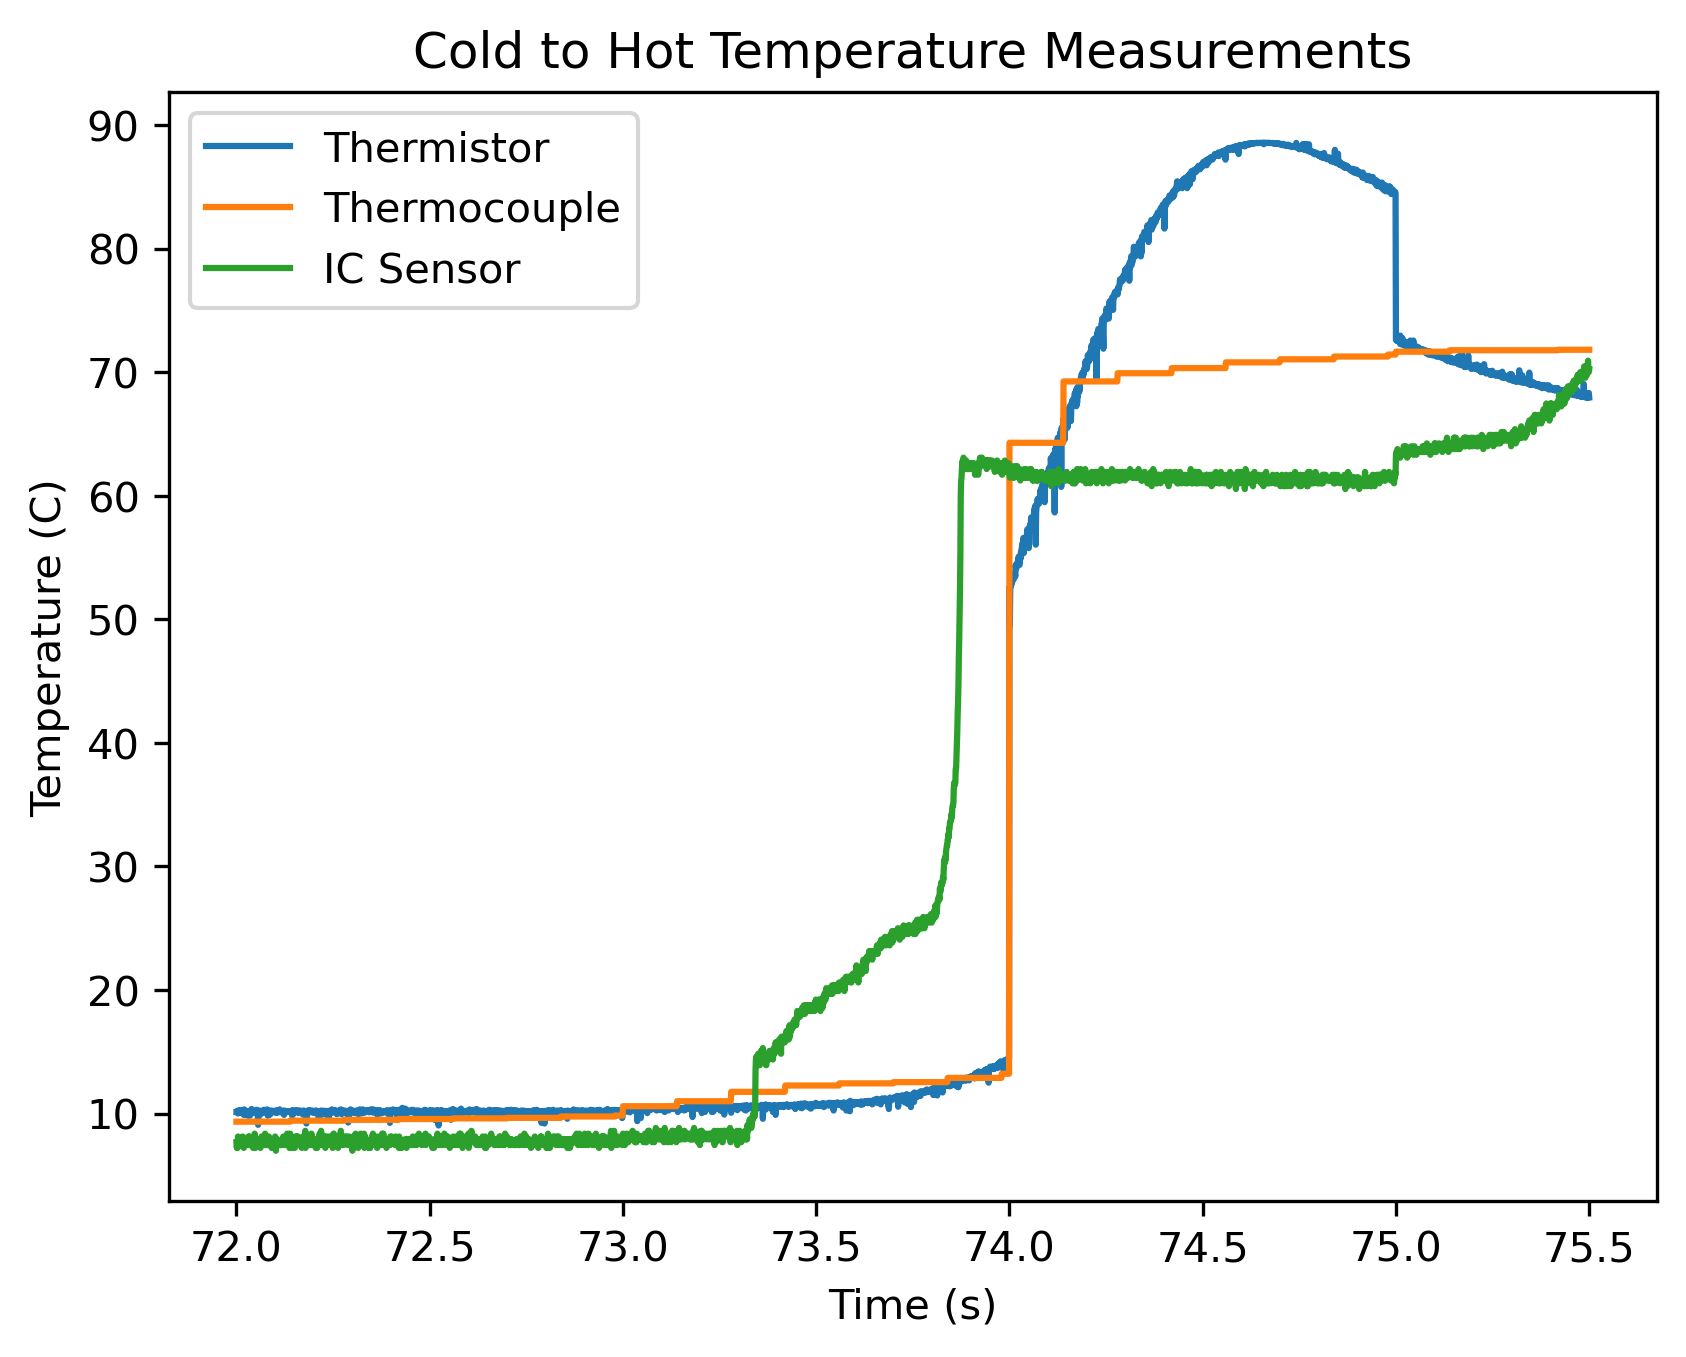

In [55]:
c2h_df = df[(df['Time'] >= 72) & (df['Time'] <= 75.5)]

plt.plot(c2h_df['Time'],c2h_df['Temperature_1 (Thermistor)'], label = 'Thermistor')
plt.plot(c2h_df['Time'],c2h_df['Temperature_0 (Collected)'], label = 'Thermocouple')
plt.plot(c2h_df['Time'],c2h_df['Temperature_2 (IC Sensor)'], label = 'IC Sensor')

plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.title('Cold to Hot Temperature Measurements')

The time constant is: 0.0602


/Users/williamzhang/Documents/College/0 - EMECH/utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = df[time_column] - min_time


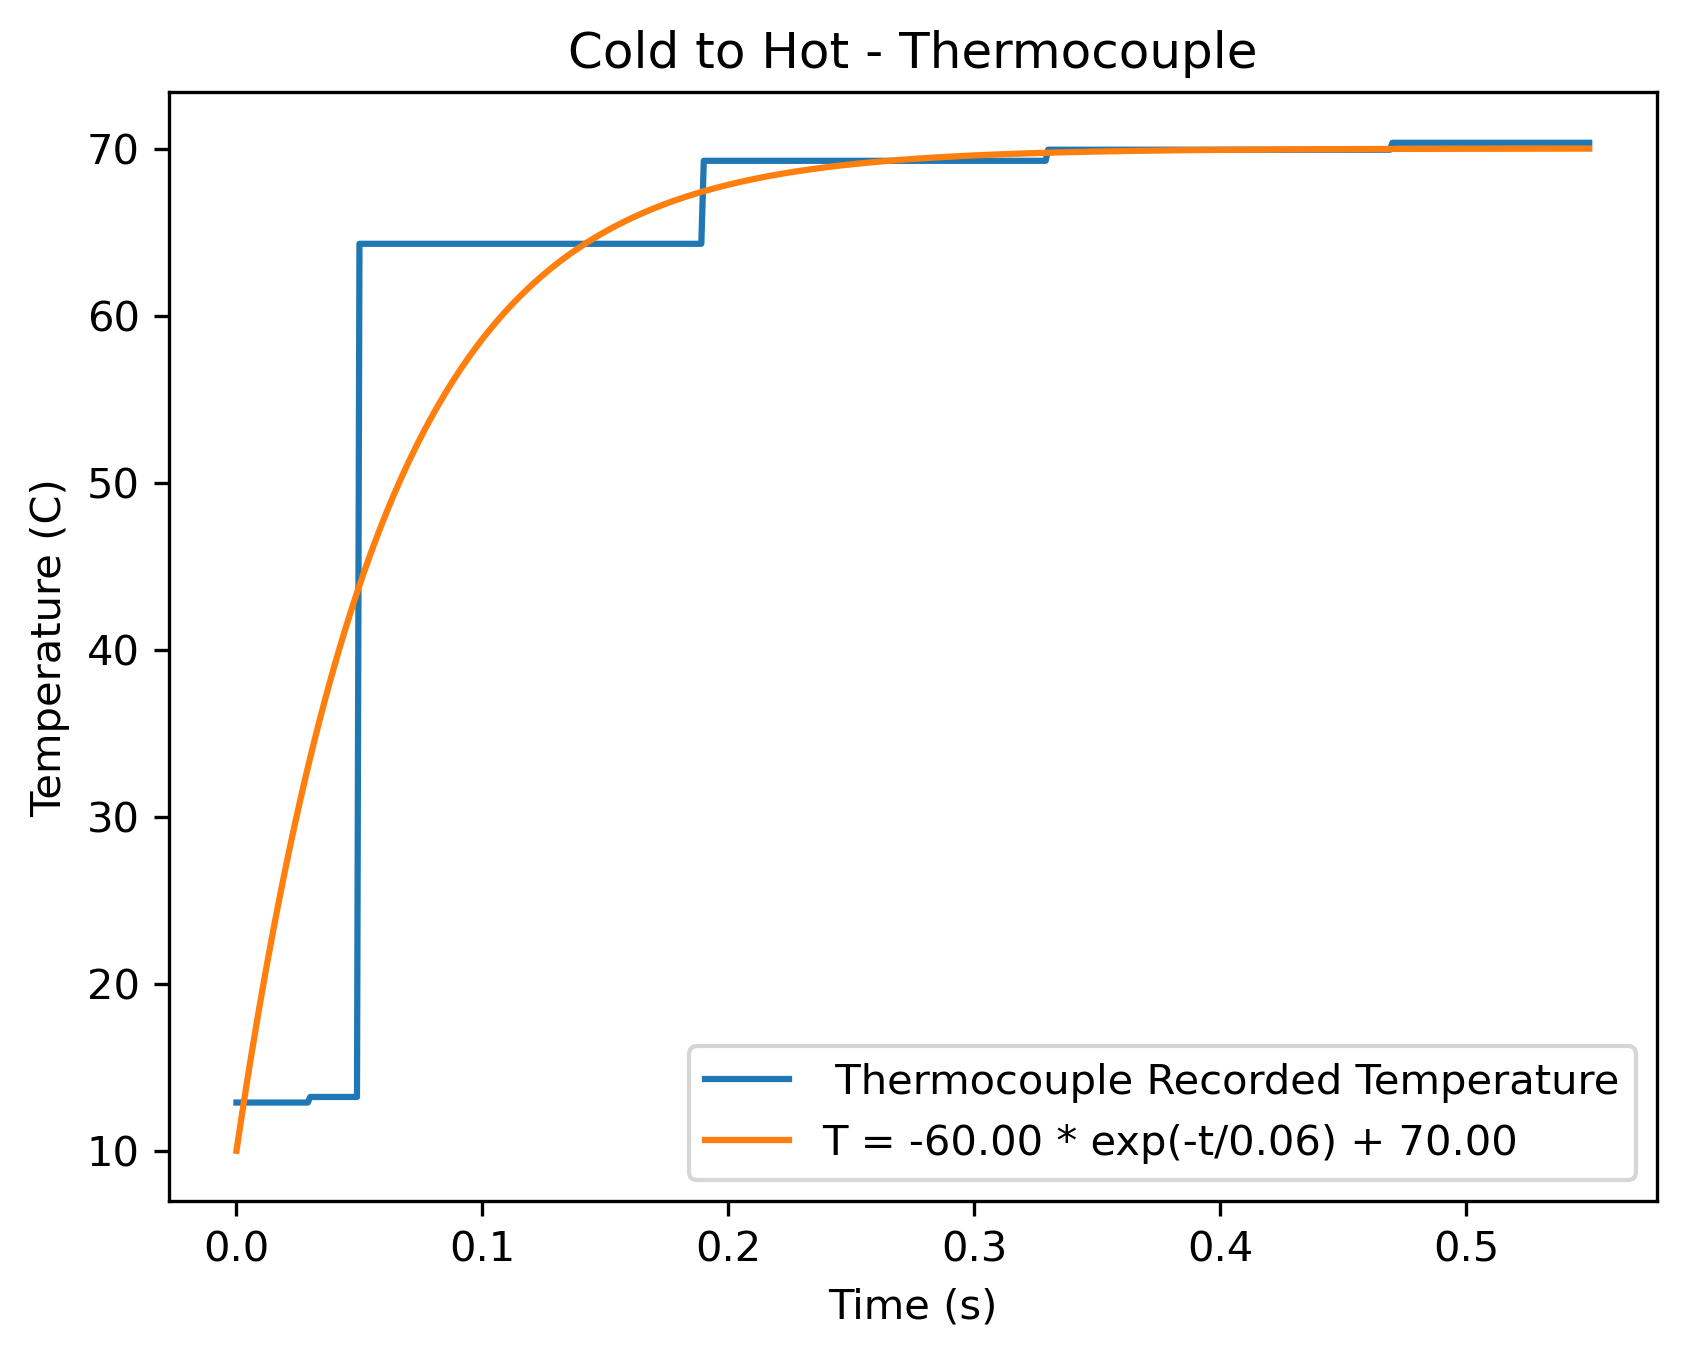

In [56]:
# Calculate Time Constants
# Thermocouple Time Constant
time = 'Time'
temp = 'Temperature_0 (Collected)'
sensor_type = 'Thermocouple'

plot_df = df[(df['Time'] >= 73.95) & (df['Time'] <= 74.5)]
reset_time(plot_df, time)

a = -60
b = 70
tau = get_just_time_constant(plot_df, time, temp, a,b , tau_initial_guess=1)
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(plot_df[time],plot_df[temp], label = f' {sensor_type} Recorded Temperature')
plt.plot(plot_df[time], [exponential_equation(t, a, tau,b ) for t in plot_df[time]], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title(f'Cold to Hot - {sensor_type}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()

The time constant is: 0.2099


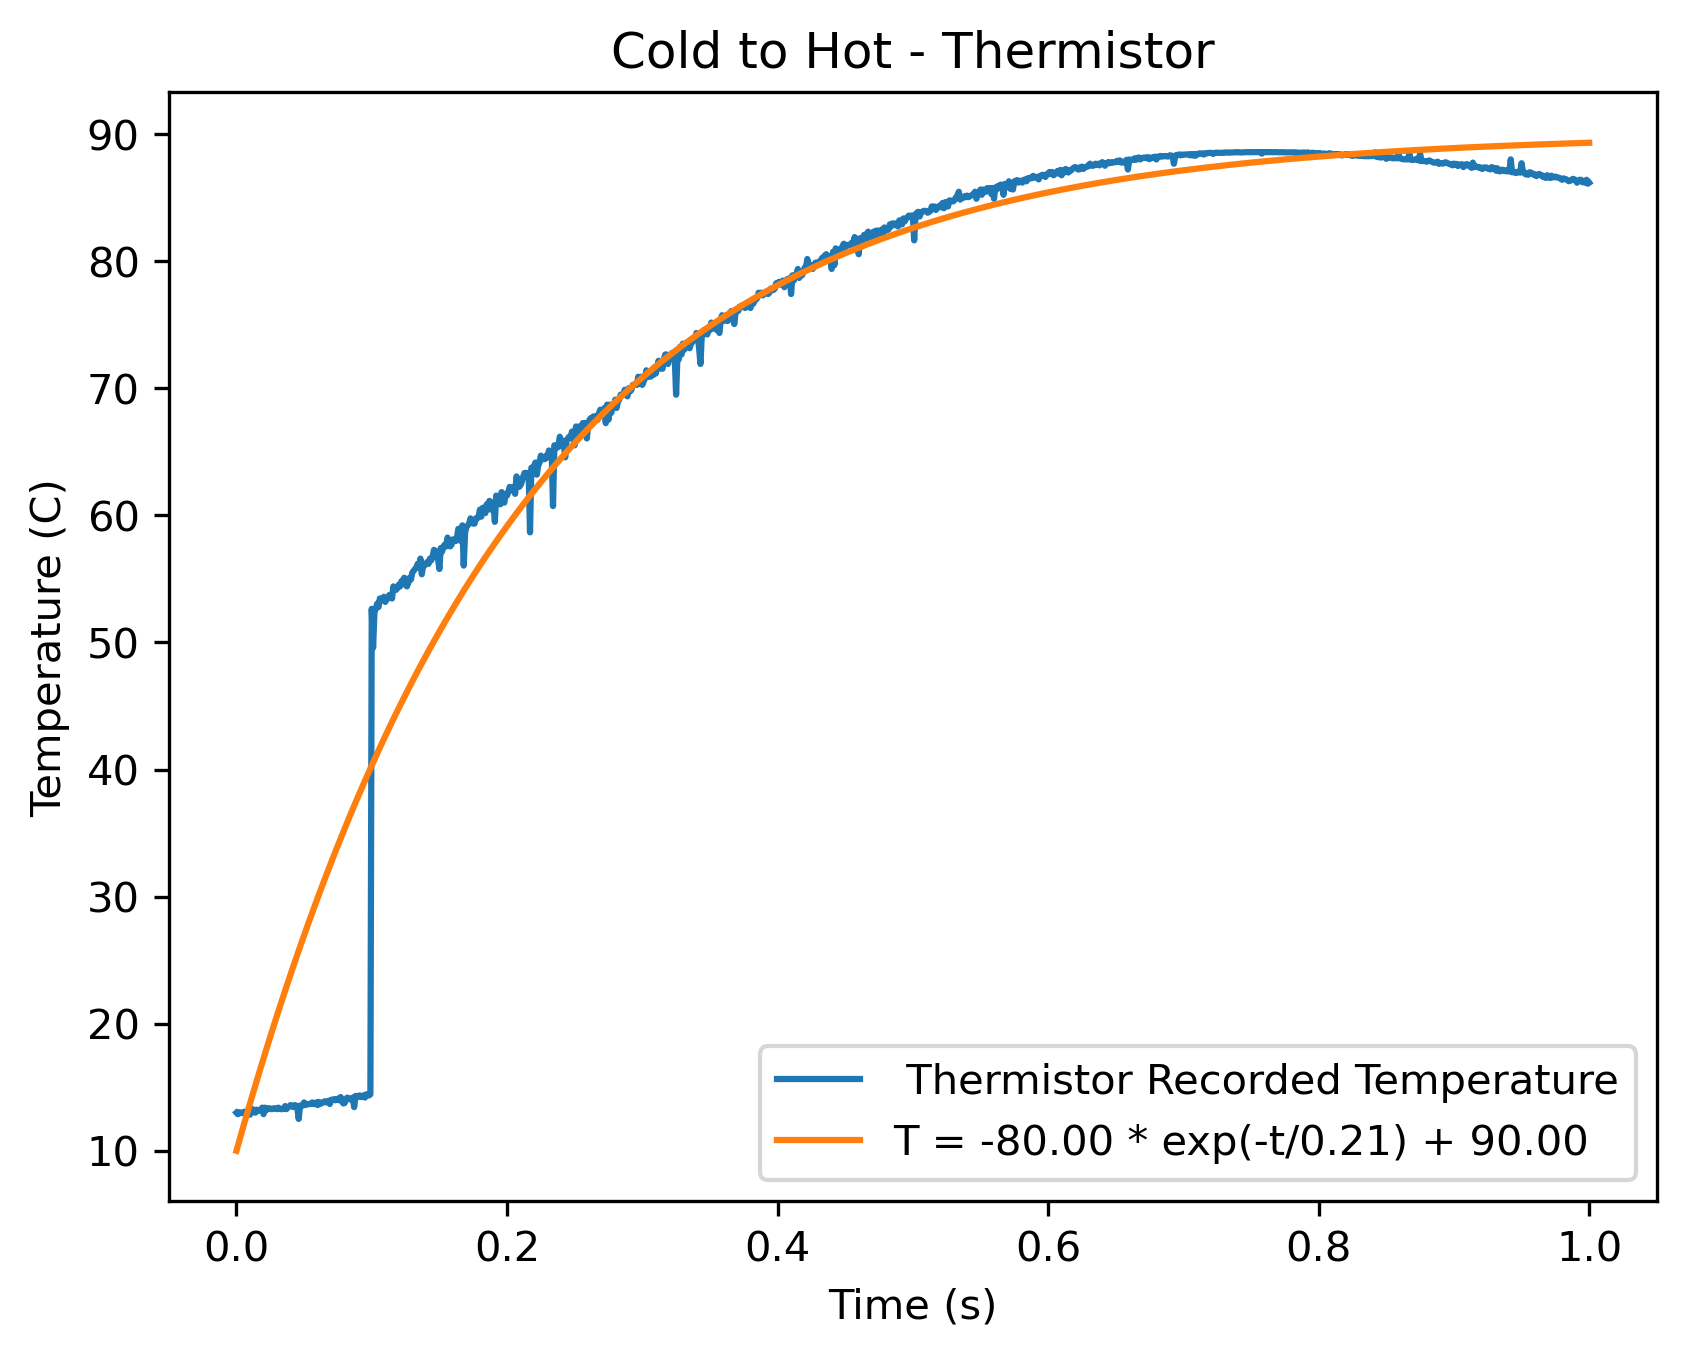

In [57]:
# Calculate Time Constants
# Thermistor Time Constant
time = 'Time'
temp = 'Temperature_1 (Thermistor)'
sensor_type = 'Thermistor'

plot_df = df[(df['Time'] >= 73.9) & (df['Time'] <= 74.9)]
reset_time(plot_df, time)

a = -80
b = 90
tau = get_just_time_constant(plot_df, time, temp, a,b , tau_initial_guess=1)
print(f'The time constant is: {tau:.4f}')

# visualize
#plot_df = df[(df['Time'] >= 73.95) & (df['Time'] <= 74.5)]
#reset_time(plot_df, time)
plt.plot(plot_df[time],plot_df[temp], label = f' {sensor_type} Recorded Temperature')
plt.plot(plot_df[time], [exponential_equation(t, a, tau,b ) for t in plot_df[time]], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title(f'Cold to Hot - {sensor_type}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()

0.07462845047189552


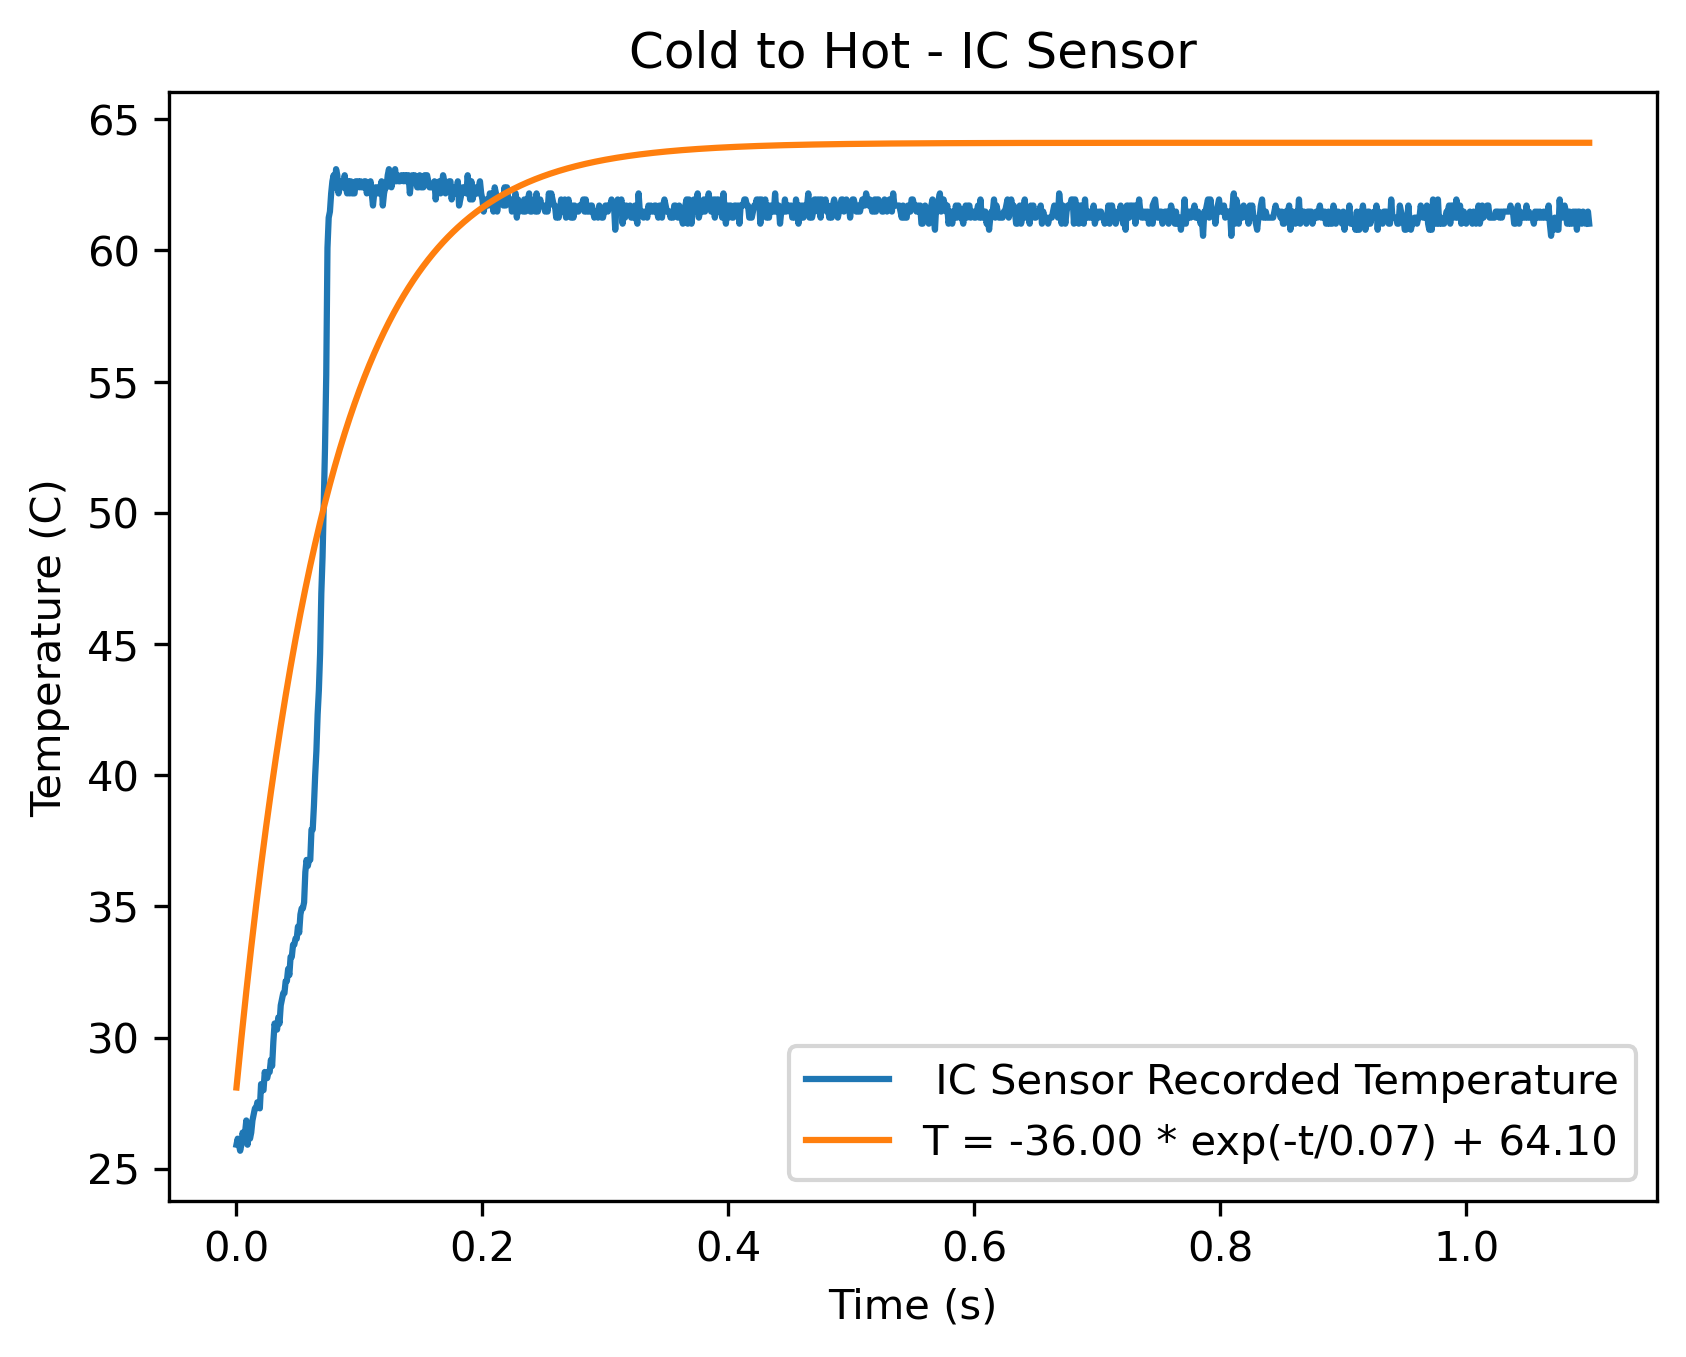

In [58]:
# Calculate Time Constants
# IC Sensor Time Constant
time = 'Time'
temp = 'Temperature_2 (IC Sensor)'
sensor_type = 'IC Sensor'

plot_df = df[(df['Time'] >= 73.8) & (df['Time'] <= 74.89)]
reset_time(plot_df, time)

a = -36
b = 64.1
tau = get_just_time_constant(plot_df, time, temp, a,b , tau_initial_guess=1)
print(tau)
#print(f'The time constant is: {tau:.4f}')

plot_df = df[(df['Time'] >= 73.8) & (df['Time'] <= 74.9)]
reset_time(plot_df, time)
# visualize
plt.plot(plot_df[time],plot_df[temp], label = f' {sensor_type} Recorded Temperature')
plt.plot(plot_df[time], [exponential_equation(t, a, tau,b ) for t in plot_df[time]], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title(f'Cold to Hot - {sensor_type}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()